In [75]:
!pip install optuna


   -------------------- ------------------- 1/2 [optuna]
   -------------------- ------------------- 1/2 [optuna]
   ---------------------------------------- 2/2 [optuna]



In [77]:
import optuna

In [79]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 3.2 MB/s eta 0:00:32
    --------------------------------------- 1.6/102.4 MB 3.8 MB/s eta 0:00:27
   - -------------------------------------- 2.6/102.4 MB 4.5 MB/s eta 0:00:23
   - -------------------------------------- 3.4/102.4 MB 4.4 MB/s eta 0:00:23
   - -------------------------------------- 4.5/102.4 MB 4.3 MB/s eta 0:00:23
   - -------------------------------------- 5.0/102.4 MB 4.2 MB/s eta 0:00:24
   -- ------------------------------------- 6.0/102.4 MB 4.2 MB/s eta 0:00:23
   -- ------------------------------------- 7.1/102.4 MB 4.4 MB/s eta 0:00:22
   --- ------------------------------------ 7.9/102.4 MB 4.3 MB/s eta 0:00:22
   --- ------------------------------------ 8.9/102.4 MB 4.4 MB/s eta 0:00:22
   --- ------------------------------------ 9.4/102.4 MB 4.3 MB/s eta 0:00:22
   --- ------------------------------------ 10.0/102.4 MB 4.2 MB/s eta 

In [81]:
!pip install cufflinks plotly

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68723 sha256=b861200f7d545ce2cd40e37cd35935dfeb850dce706239b89f84e22676410d2c
  Stored in directory: c:\users\minse\appdata\local\pip\cache\wheels\13\bc\65\1ac45445dba1052b5e837dc49f5282c8cb2f934ae9e6f62f0e
Successfully built cufflinks

   ---------------------------------------- 2/2 [cufflinks]



  DEPRECATION: Building 'cufflinks' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'cufflinks'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [83]:
!pip install missingno

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [86]:
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_colwidth', 200)


df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


In [91]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [92]:
numerical= df.drop(['DEATH_EVENT'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [93]:
df[categorical].nunique()

Series([], dtype: float64)

In [94]:
y = df['DEATH_EVENT']
print(f'Percentage of patient had a HeartDisease:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a HeartDisease: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} patient)')

Percentage of patient had a HeartDisease:  32.11 %  --> (96 patient)
Percentage of patient did not have a HeartDisease: 67.89  %  --> (203 patient)


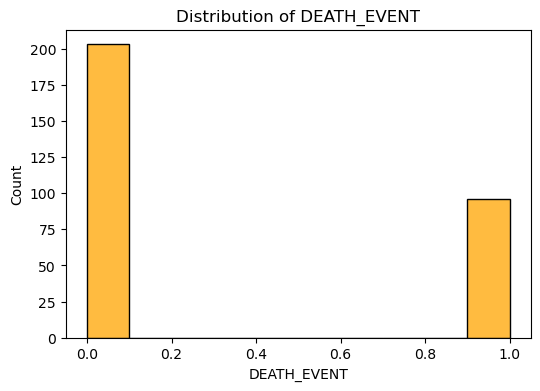

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['DEATH_EVENT'], bins=10, kde=False, color='orange')
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

In [99]:
df[numerical].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


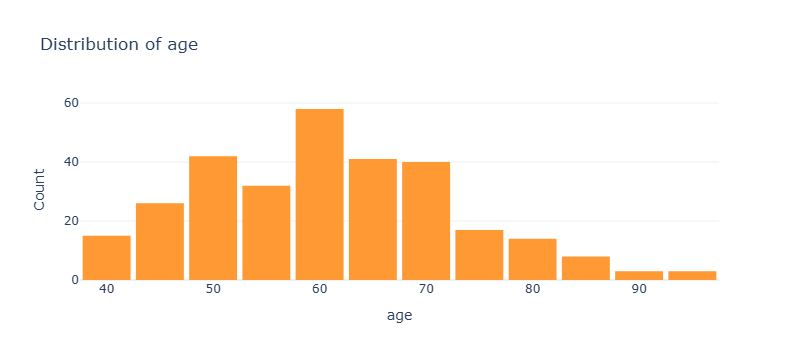

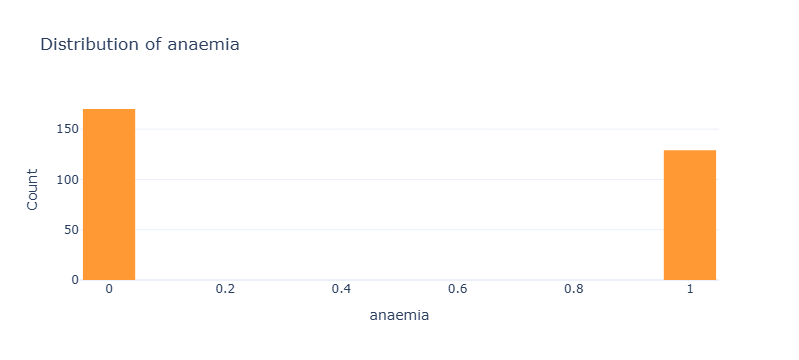

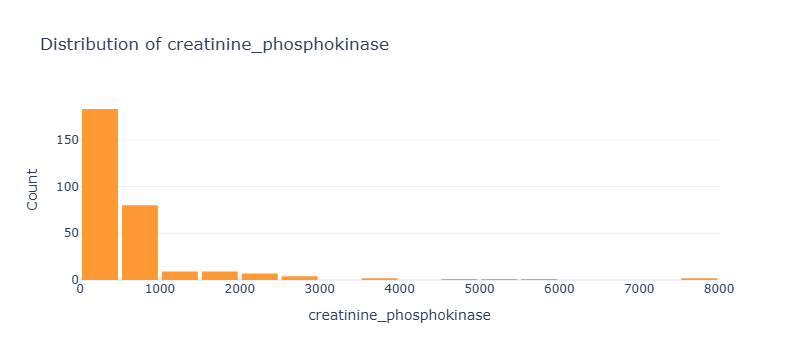

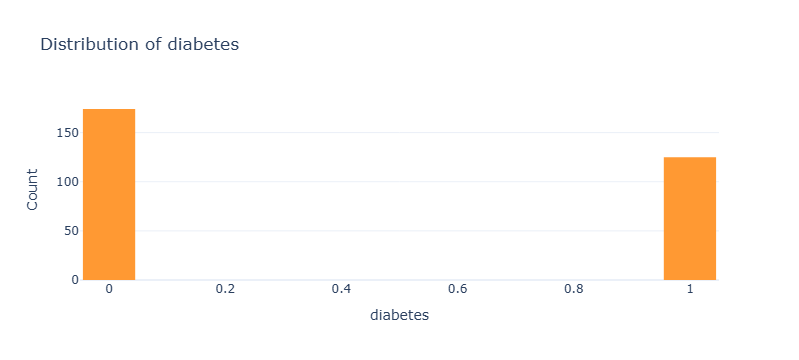

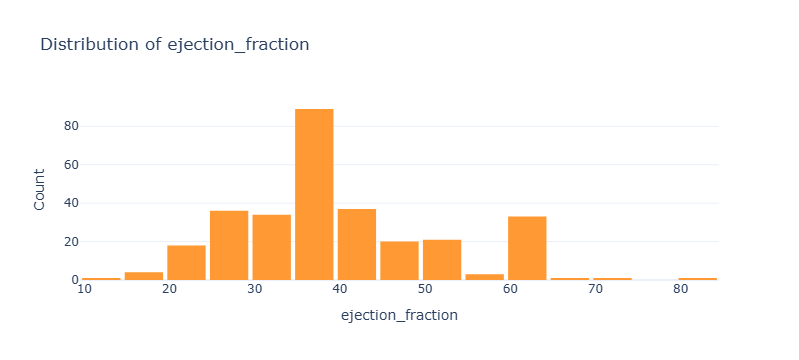

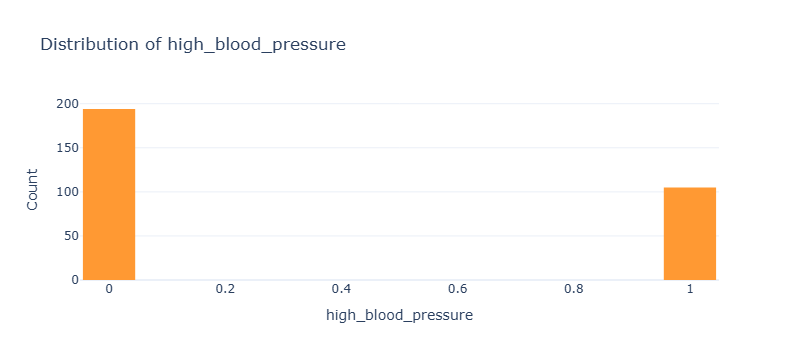

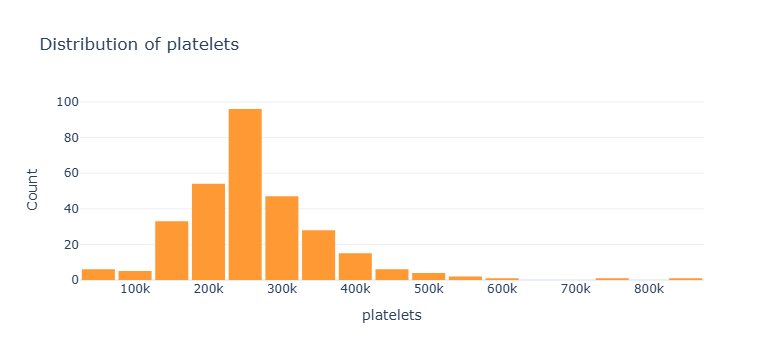

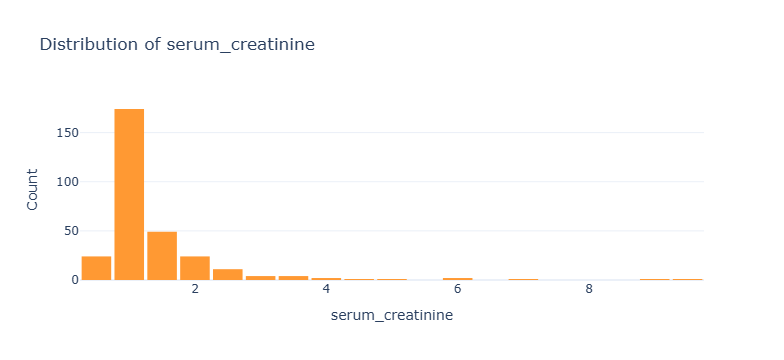

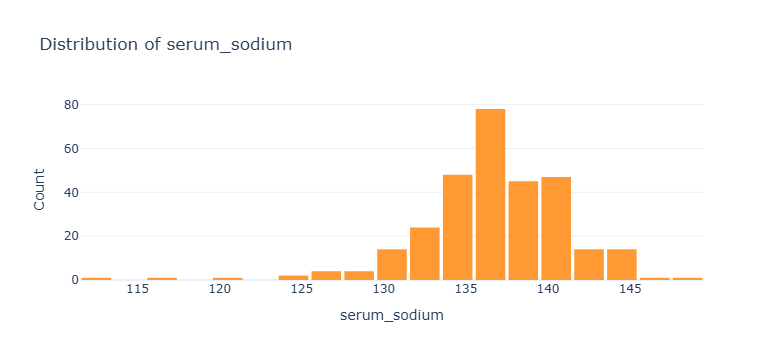

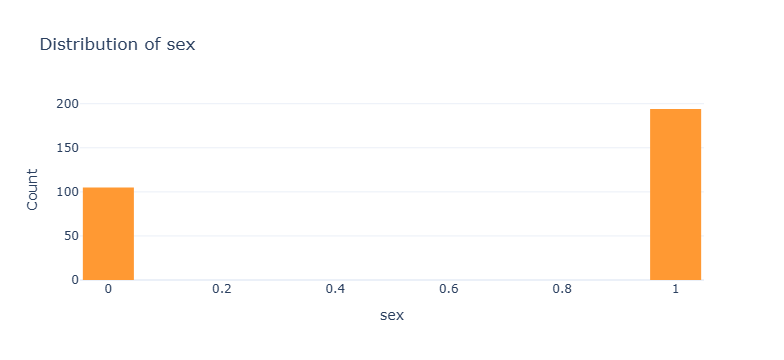

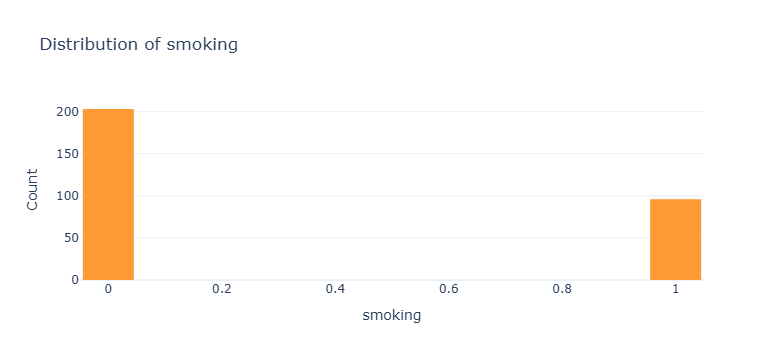

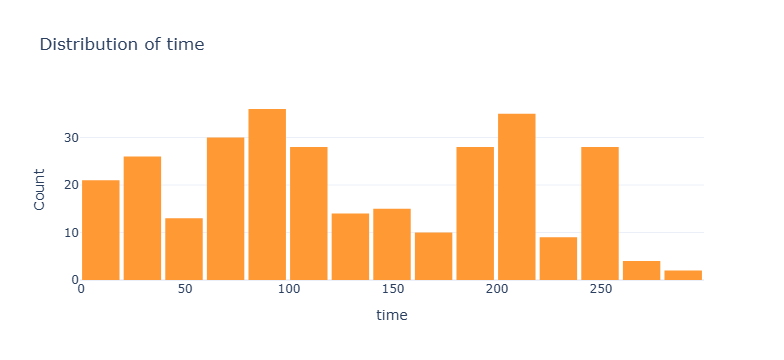

In [105]:
import plotly.express as px

for col in numerical:
    fig = px.histogram(
        df,
        x=col,
        nbins=20,
        title=f"Distribution of {col}",
        color_discrete_sequence=['#FF9933'] 
    )
    fig.update_layout(
        bargap=0.1,
        template='plotly_white',
        xaxis_title=col,
        yaxis_title='Count'
    )
    fig.show()

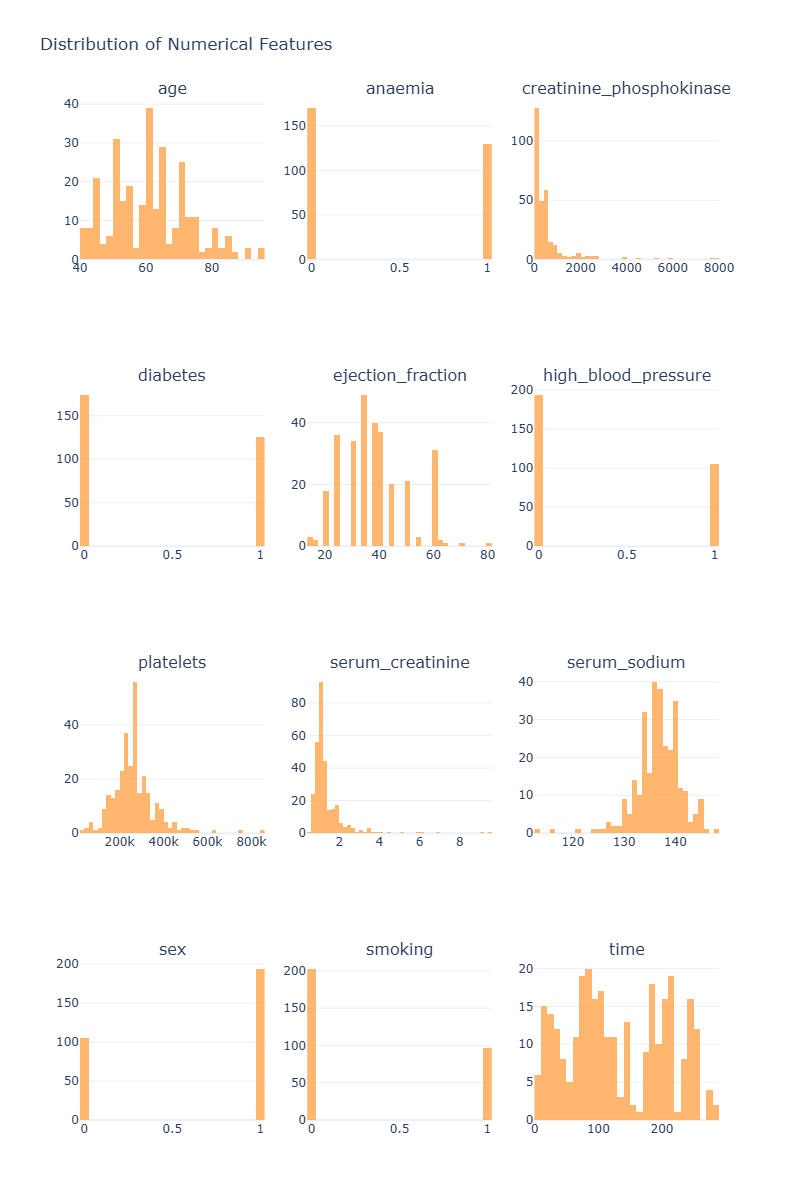

In [107]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# subplot 행렬 만들기
rows = (len(numerical) + 2) // 3  # 3열씩 배치
fig = sp.make_subplots(rows=rows, cols=3, subplot_titles=numerical)

# 각 수치형 변수별 히스토그램 추가
for i, col in enumerate(numerical):
    r = i // 3 + 1
    c = i % 3 + 1
    hist = go.Histogram(x=df[col], nbinsx=50, name=col, marker_color='#FF9933', opacity=0.7)
    fig.add_trace(hist, row=r, col=c)

# 전체 레이아웃 설정
fig.update_layout(
    height=300 * rows,
    width=900,
    title_text='Distribution of Numerical Features',
    showlegend=False,
    template='plotly_white'
)

fig.show()

In [109]:
skew_limit = 0.75
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

creatinine_phosphokinase    4.463110
serum_creatinine            4.455996
platelets                   1.462321
smoking                     0.770349
serum_sodium               -1.048136
dtype: float64

<Axes: >

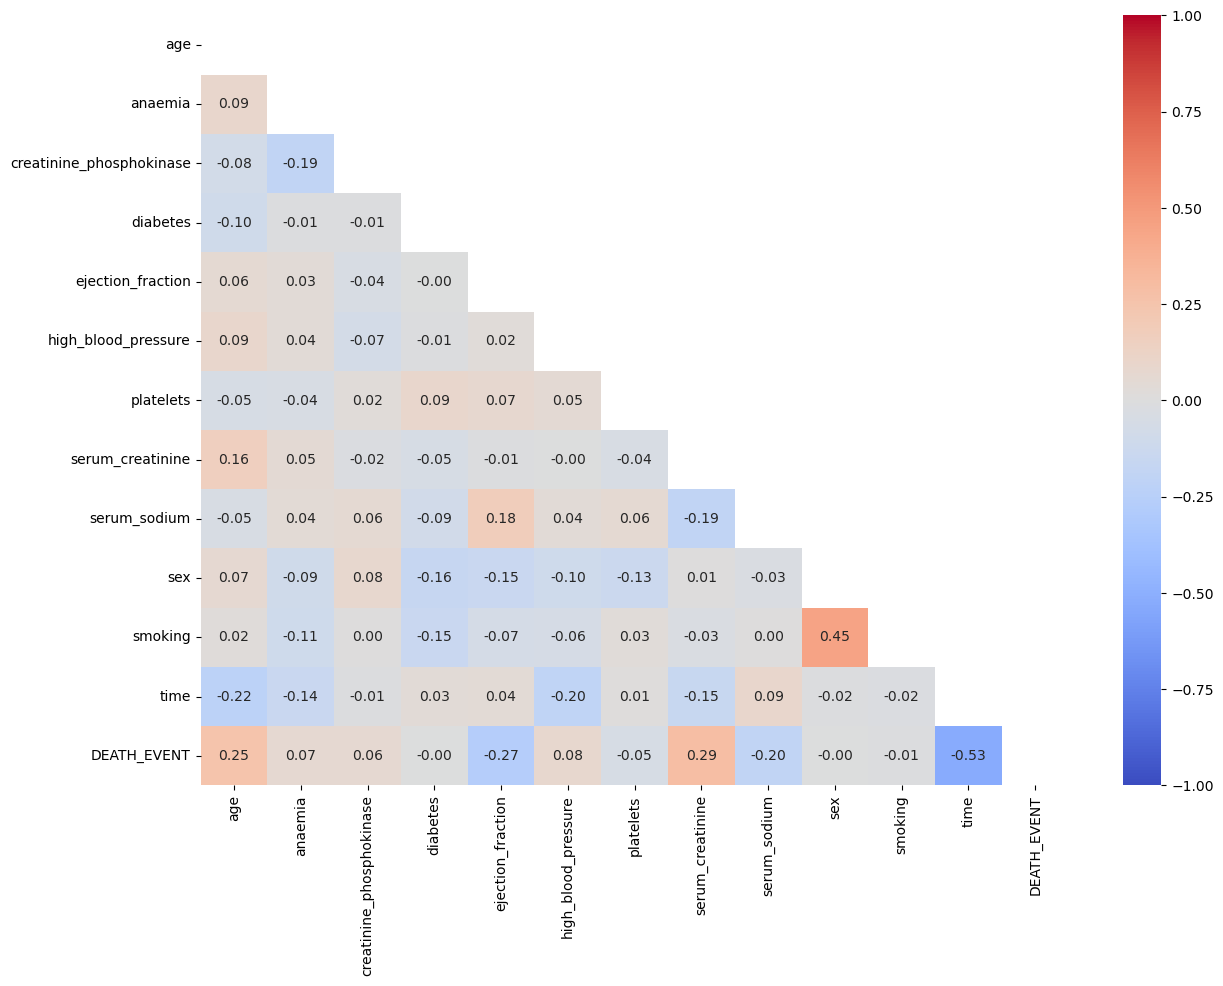

In [111]:
numerical1= df.select_dtypes('number').columns


matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax)

In [112]:
df[categorical].head()

""
0
1
2
3
4


In [115]:
print (f'A female person has a probability of {round(df[df["sex"]=="F"]["DEATH_EVENT"].mean()*100,2)} % have a HeartDisease')

print()

print (f'A male person has a probability of {round(df[df["sex"]=="M"]["DEATH_EVENT"].mean()*100,2)} % have a HeartDisease')

print()

A female person has a probability of nan % have a HeartDisease

A male person has a probability of nan % have a HeartDisease



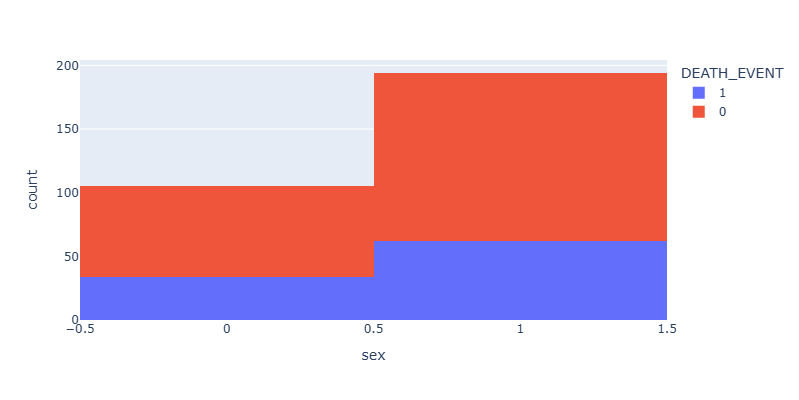

In [116]:
fig = px.histogram(df, x="sex", color="DEATH_EVENT",width=400, height=400)
fig.show()

In [118]:
df.groupby('high_blood_pressure')['DEATH_EVENT'].mean().sort_values(ascending=False)

high_blood_pressure
1    0.371429
0    0.293814
Name: DEATH_EVENT, dtype: float64

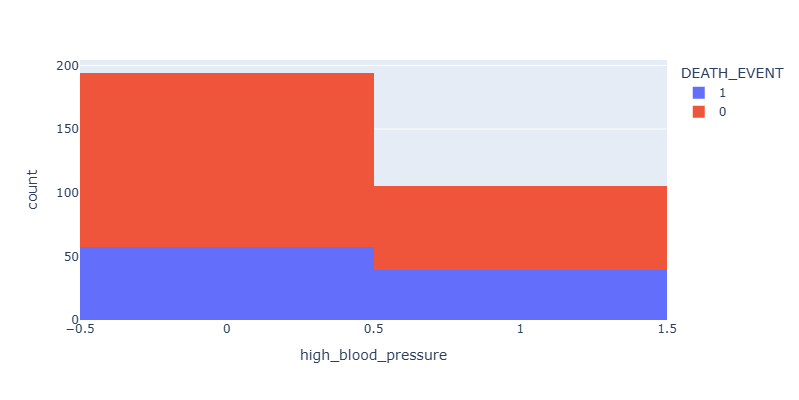

In [119]:
fig = px.histogram(df, x="high_blood_pressure", color="DEATH_EVENT",width=400, height=400)
fig.show()

In [120]:
df.groupby('ejection_fraction')['DEATH_EVENT'].mean().sort_values(ascending=False)

ejection_fraction
14    1.000000
15    1.000000
70    1.000000
65    1.000000
20    0.888889
17    0.500000
62    0.500000
25    0.500000
30    0.382353
38    0.375000
55    0.333333
50    0.285714
45    0.250000
35    0.142857
60    0.129032
40    0.108108
80    0.000000
Name: DEATH_EVENT, dtype: float64

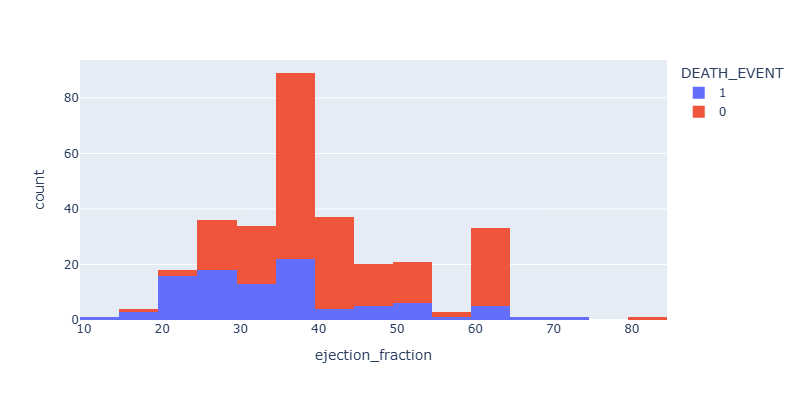

In [121]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT",width=400, height=400)
fig.show()

In [122]:
accuracy =[]
model_names =[]


X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  


model = DummyClassifier(strategy='constant', constant=1)
pipe = make_pipeline(ct, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and  accuracy score is : 0.4111


,Accuracy
DummyClassifier,0.4111


In [123]:
accuracy =[]
model_names =[]


X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.7444
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8111
model : SVC() and  accuracy score is : 0.5889
model : KNeighborsClassifier() and  accuracy score is : 0.5556


,Accuracy
Logistic,0.7444
LinearDiscriminant,0.8111
SVM,0.5889
KNeighbors,0.5556


In [124]:
def objective(trial):
    X= df.drop('HeartDisease', axis=1)
    y= df['HeartDisease']
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2025-10-05 19:09:19,644] A new study created in memory with name: no-name-7a92c6a8-03dd-4b76-af36-a74f62480425
[W 2025-10-05 19:09:19,646] Trial 0 failed with parameters: {} because of the following error: KeyError("['HeartDisease'] not found in axis").
Traceback (most recent call last):
  File "C:\Users\minse\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\minse\AppData\Local\Temp\ipykernel_29252\3668253902.py", line 2, in objective
    X= df.drop('HeartDisease', axis=1)
  File "C:\Users\minse\anaconda3\Lib\site-packages\pandas\core\frame.py", line 5581, in drop
    return super().drop(
           ~~~~~~~~~~~~^
        labels=labels,
        ^^^^^^^^^^^^^^
    ...<5 lines>...
        errors=errors,
        ^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\minse\anaconda3\Lib\site-packages\pandas\core\generic.py", line 4788, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "

KeyError: "['HeartDisease'] not found in axis"

In [126]:
accuracy =[]
model_names =[]


X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']
categorical_features_indices = np.where(X.dtypes != np.float64)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0,
                          objective= 'CrossEntropy',
    colsample_bylevel= 0.04292240490294766,
    depth= 10,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        53
           1       0.94      0.41      0.57        37

    accuracy                           0.74        90
   macro avg       0.82      0.69      0.69        90
weighted avg       0.80      0.74      0.71        90



,Accuracy
Catboost_tuned,0.7444


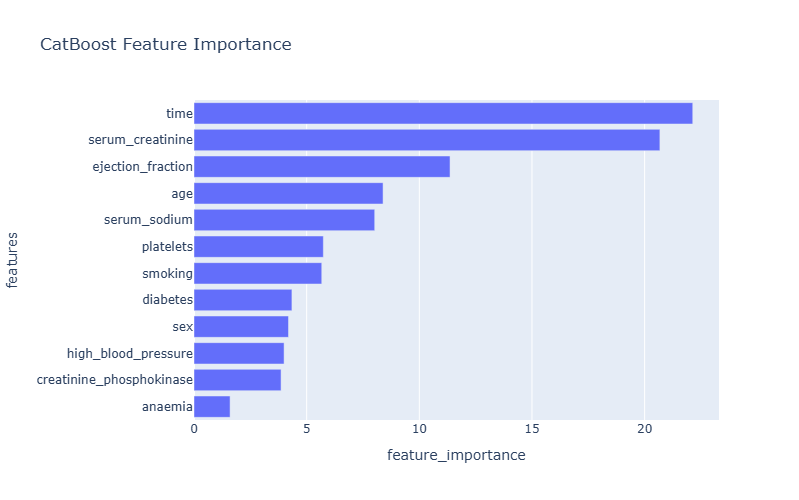

In [127]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="CatBoost Feature Importance",height=500)
fig.show()

In [129]:
result_df2 = pd.DataFrame()
result_df3 = pd.DataFrame()
result_df4 = pd.DataFrame()
result_df5 = pd.DataFrame()
result_df6 = pd.DataFrame()

In [130]:
result_final = pd.concat([dummy_result_df,result_df1,result_df2,result_df3,result_df4,result_df5,result_df6],axis=0)

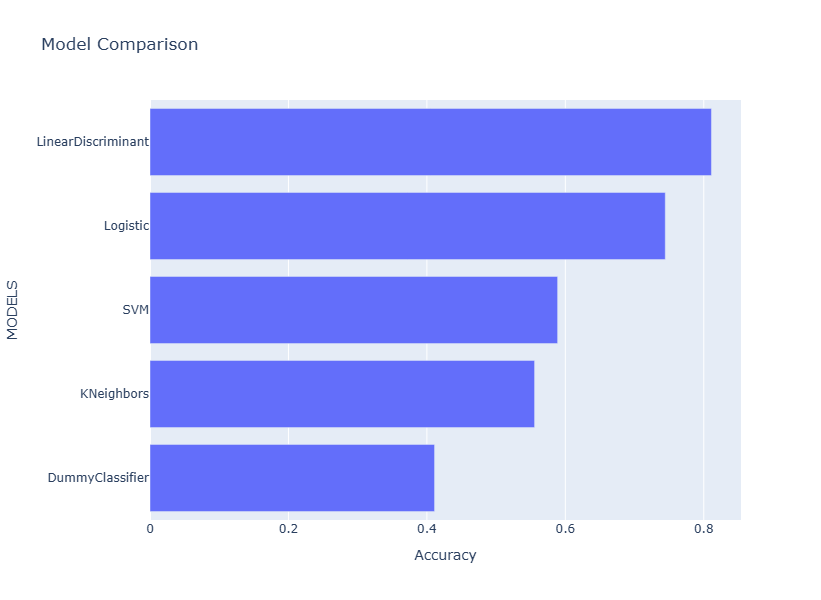

In [131]:
result_final.sort_values(by=['Accuracy'], ascending=True,inplace=True)
fig = px.bar(result_final, x='Accuracy', y=result_final.index,title='Model Comparison',height=600,labels={'index':'MODELS'})
fig.show()